### **Mean-Shift Clustering**

#### 1. Kernel Density Estimation (KDE):

Kernel Density Estimation (KDE) is a non-parametric technique used to estimate the probability density function (pdf) of a continuous random variable. Rather than counting occurrences in fixed intervals (like histograms), KDE smoothens the data points with a kernel, resulting in a continuous curve (density function).

#### 2. Mean-Shift Clustering:

Mean-shift clustering is a technique that identifies clusters in data based on the density of data points. The core idea is to identify the "modes" or peaks of the density, where the density is estimated using KDE.

#### Algorithm:
1. Choose a bandwidth parameter, which determines the size of the kernel and, consequently, the smoothness of the estimated density.
2. For each data point, place the kernel at that point and compute the mean (or "centroid") of the data within the kernel.
3. Shift the kernel to the location of the mean and repeat until convergence.
4. Once all points converge (or stop moving), those moving to the same mode or peak are considered part of the same cluster.

#### 3. Mean-Shift's Ability to Find Non-spherical Clusters:

Mean-Shift doesn't make assumptions about the shape of clusters, unlike methods like k-means. Instead, it uses the underlying density of data points to find and adapt to the shape of each cluster. As a result, mean-shift can detect clusters of any shape, including elongated or irregularly shaped clusters.

#### Key Parameters

1. **`bandwidth`**:
    - **Description**: The bandwidth of the kernel. If `None`, the bandwidth is estimated using a heuristic based on the median of pairwise distances among the data points.
    - **Typical Usage**: A smaller bandwidth will produce more clusters, while a larger bandwidth may merge distinct clusters. If unsure, using the `estimate_bandwidth` function from `sklearn` can provide a reasonable starting point.

2. **`seeds`**:
    - **Description**: Initial seeding points for the clustering. If `None`, the algorithm uses a flat kernel to initialize.
    - **Typical Usage**: Generally, this is left as `None` for the algorithm to automatically choose seed points. However, if you have prior knowledge about the data or potential cluster centers, you can provide them.

3. **`bin_seeding`**:
    - **Description**: If `True`, initial kernel locations are not locations of all data points, but rather the location of the discretized version of the data, where data points are binned onto a grid whose coarseness corresponds to the bandwidth.
    - **Default**: `False`
    - **Typical Usage**: Setting this to `True` can speed up the algorithm, especially when the number of data points is large. However, it might compromise the accuracy of cluster assignments.

4. **`min_bin_freq`**:
    - **Description**: To speed up the algorithm, accept only those bins with at least `min_bin_freq` points as seeds.
    - **Default**: 1
    - **Typical Usage**: Increase this if the dataset is large and you're using `bin_seeding=True`. It helps in ignoring bins with fewer points, potentially speeding up the process.

5. **`cluster_all`**:
    - **Description**: If `True`, all the data points that are not assigned to any cluster (outliers) are assigned to the closest cluster center. If `False`, outliers are given the label `-1`.
    - **Default**: `True`
    - **Typical Usage**: If you suspect the presence of outliers or want to explicitly handle data points that don't belong to any cluster, set this to `False`.


### Exercise

Adjust the preceding parameters to see if you can improve the clustering.

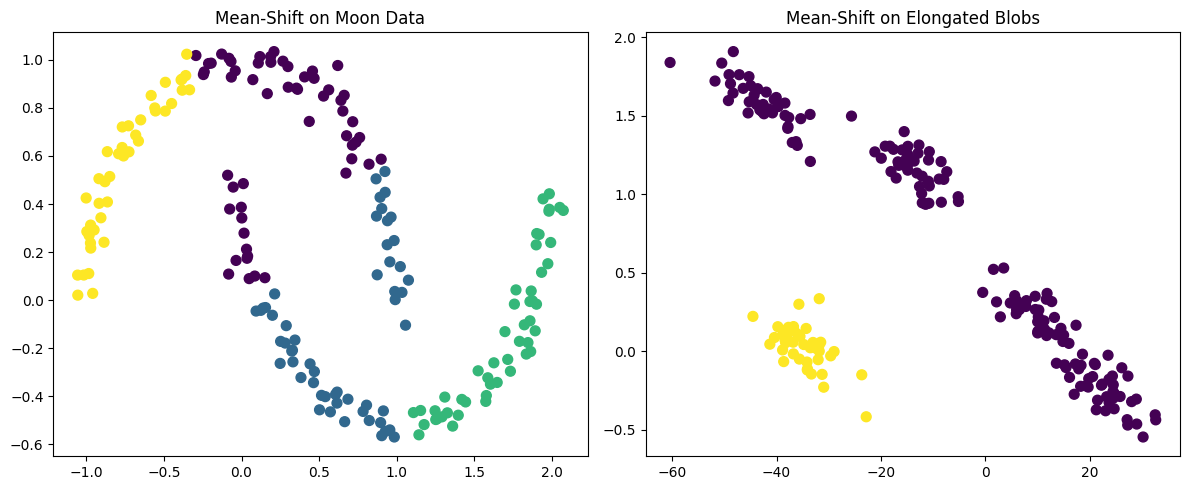

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

# Generate synthetic data: two moon shapes and elongated blobs
X_moons, _ = make_moons(n_samples=200, noise=0.05)
X_blobs, y = make_blobs(n_samples=200, centers=5, random_state=42)

# Create a transformation matrix to stretch the blob
transformation_matrix = np.array([[5, -.1], [0, 0.1]])

# Apply the transformation to the blobs
X_blobs_stretched = np.dot(X_blobs, transformation_matrix)


# Mean-Shift clustering
bandwidth_moons = estimate_bandwidth(X_moons, quantile=0.2)
ms_moons = MeanShift(bandwidth=bandwidth_moons).fit(X_moons)

bandwidth_blobs = estimate_bandwidth(X_blobs_stretched, quantile=0.2)
ms_blobs = MeanShift(bandwidth=bandwidth_blobs).fit(X_blobs)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=ms_moons.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Moon Data')

plt.subplot(1, 2, 2)
plt.scatter(X_blobs_stretched[:, 0], X_blobs_stretched[:, 1], c=ms_blobs.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Elongated Blobs')

plt.tight_layout()
plt.show()